In [0]:
My First StyleGAN Encoder - getting started with https://github.com/pbaylies/stylegan-encoder
  
 * Note: make sure you're using the GPU runtime for this - see Runtime -> Change Runtime Type in Google Colab
  
First, clone the repo - we'll put it in the current directory:

In [0]:
!rm -rf sample_data
!git clone https://github.com/pbaylies/stylegan-encoder
!mv stylegan-encoder/* stylegan-encoder/.git .
!rmdir stylegan-encoder

Cloning into 'stylegan-encoder'...
remote: Enumerating objects: 10, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 189 (delta 2), reused 7 (delta 2), pack-reused 179
Receiving objects: 100% (189/189), 10.42 MiB | 12.34 MiB/s, done.
Resolving deltas: 100% (82/82), done.


In [0]:
Optionally, try training a ResNet of your own if you like; this could take a while. Remember, there's a pre-trained model linked in the repo that works with the FFHQ faces StyleGAN model)

In [4]:
!python train_resnet.py --help
!python train_resnet.py --test_size 256 --batch_size 1024 --loop 1 --max_patience 1

Using TensorFlow backend.
usage: train_resnet.py [-h] [--model_url MODEL_URL] [--model_res MODEL_RES]
                       [--data_dir DATA_DIR] [--model_path MODEL_PATH]
                       [--model_depth MODEL_DEPTH] [--model_size MODEL_SIZE]
                       [--activation ACTIVATION] [--optimizer OPTIMIZER]
                       [--loss LOSS] [--use_fp16 USE_FP16]
                       [--image_size IMAGE_SIZE] [--batch_size BATCH_SIZE]
                       [--test_size TEST_SIZE] [--truncation TRUNCATION]
                       [--max_patience MAX_PATIENCE]
                       [--freeze_first FREEZE_FIRST] [--epochs EPOCHS]
                       [--minibatch_size MINIBATCH_SIZE] [--seed SEED]
                       [--loop LOOP]

Train a ResNet to predict latent representations of images in a StyleGAN model
from generated examples

optional arguments:
  -h, --help            show this help message and exit
  --model_url MODEL_URL
                        Fetch a S

Next, let's get some test images to work with... These are from Pexels, which has free stock photos.

In [5]:
!mkdir aligned_images raw_images
!wget -O raw_images/stock_photo.jpg 'https://images.pexels.com/photos/614810/pexels-photo-614810.jpeg?auto=compress&cs=tinysrgb&dpr=3&h=1536&w=1536'
!wget -O raw_images/stock_photo2.jpg 'https://images.pexels.com/photos/1445467/pexels-photo-1445467.jpeg?auto=compress&cs=tinysrgb&dpr=3&h=1536&w=1536'

--2019-09-28 08:05:13--  https://images.pexels.com/photos/614810/pexels-photo-614810.jpeg?auto=compress&cs=tinysrgb&dpr=3&h=1536&w=1536
Resolving images.pexels.com (images.pexels.com)... 104.17.209.102, 104.17.208.102, 2606:4700::6811:d166, ...
Connecting to images.pexels.com (images.pexels.com)|104.17.209.102|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 753421 (736K) [image/jpeg]
Saving to: ‘raw_images/stock_photo.jpg’

raw_images/stock_ph 100%[===================>] 735.76K  4.72MB/s    in 0.2s    

2019-09-28 08:05:13 (4.72 MB/s) - ‘raw_images/stock_photo.jpg’ saved [753421/753421]

--2019-09-28 08:05:13--  https://images.pexels.com/photos/1445467/pexels-photo-1445467.jpeg?auto=compress&cs=tinysrgb&dpr=3&h=1536&w=1536
Resolving images.pexels.com (images.pexels.com)... 104.17.208.102, 104.17.209.102, 2606:4700::6811:d066, ...
Connecting to images.pexels.com (images.pexels.com)|104.17.208.102|:443... connected.
HTTP request sent, awaiting response... 200 OK

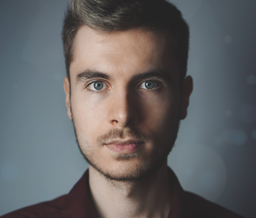

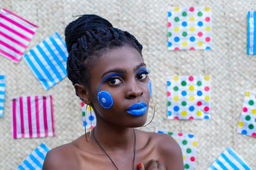

In [6]:
import PIL.Image
img1 = PIL.Image.open('raw_images/stock_photo.jpg')
wpercent = (256/float(img1.size[0]))
hsize = int((float(img1.size[1])*float(wpercent)))
img1 = img1.resize((256,hsize), PIL.Image.LANCZOS)
img2 = PIL.Image.open('raw_images/stock_photo2.jpg')
wpercent = (256/float(img2.size[0]))
hsize = int((float(img2.size[1])*float(wpercent)))
img2 = img2.resize((256,hsize), PIL.Image.LANCZOS)
display(img1,img2)

Now we need to get just the faces, cropped and aligned... fortunately, there's already a script for this!

In [11]:
!python align_images.py raw_images/ aligned_images/

Using TensorFlow backend.
64045056/64040097 [==============================] - 27s 0us/step
Aligning stock_photo2.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/stock_photo2_01.png
Aligning stock_photo.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_images/stock_photo_01.png


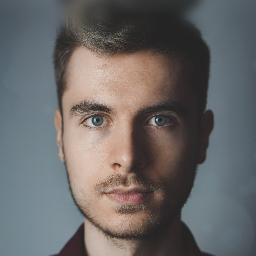

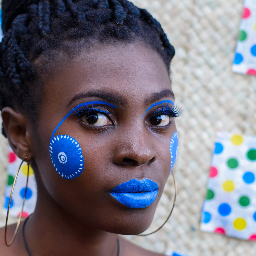

In [12]:
display(PIL.Image.open('aligned_images/stock_photo_01.png').resize((256,256)))
display(PIL.Image.open('aligned_images/stock_photo2_01.png').resize((256,256)))

Finally, let's try encoding some images into a latent representation! That's what you came here for, right? Let's just do a quick encoding, and see how we do...

In [19]:
!python encode_images.py --batch_size=2 --output_video=True aligned_images/ generated_images/ latent_representations/

Using TensorFlow backend.
Instructions for updating:
Colocations handled automatically by placer.
  0%|                                                   | 0/100 [00:00<?, ?it/s]WARNING:tensorflow:From /home/anpei/anaconda3/envs/styleGan/lib/python3.7/site-packages/tensorflow/python/ops/math_ops.py:3066: to_int32 (from tensorflow.python.ops.math_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
This op will be removed after the deprecation date. Please switch to tf.sets.difference().

stock_photo_01 stock_photo2_01: loss 384.1647; lr 0.0200:   0%| | 0/100 [00:07<?, ?it/s]
stock_photo_01 stock_photo2_01: loss 384.1647; lr 0.0200:   1%| | 1/100 [00:08<13:49,  8.38s/it]
stock_photo_01 stock_photo2_01: loss 324.6917; lr 0.0200:   1%| | 1/100 [00:08<13:49,  8.38s/it]
stock_photo_01 stock_photo2_01: loss 324.6917; lr 0.0200:   2%| | 2/100 [00:08<09:49,  6.02s/it]
stock_photo_01 stock_photo2_01: loss 294.9917

stock_photo_01 stock_photo2_01: loss 152.2464; lr 0.0096:  76%|▊| 76/100 [00:46<00:12,  1.95it/s]
stock_photo_01 stock_photo2_01: loss 151.9701; lr 0.0096:  76%|▊| 76/100 [00:47<00:12,  1.95it/s]
stock_photo_01 stock_photo2_01: loss 151.9701; lr 0.0096:  77%|▊| 77/100 [00:47<00:11,  1.96it/s]
stock_photo_01 stock_photo2_01: loss 151.7103; lr 0.0096:  77%|▊| 77/100 [00:47<00:11,  1.96it/s]
stock_photo_01 stock_photo2_01: loss 151.7103; lr 0.0096:  78%|▊| 78/100 [00:47<00:11,  1.96it/s]
stock_photo_01 stock_photo2_01: loss 151.5656; lr 0.0096:  78%|▊| 78/100 [00:48<00:11,  1.96it/s]
stock_photo_01 stock_photo2_01: loss 151.5656; lr 0.0096:  79%|▊| 79/100 [00:48<00:10,  1.95it/s]
stock_photo_01 stock_photo2_01: loss 151.3145; lr 0.0086:  79%|▊| 79/100 [00:48<00:10,  1.95it/s]
stock_photo_01 stock_photo2_01: loss 151.3145; lr 0.0086:  80%|▊| 80/100 [00:48<00:10,  1.95it/s]
stock_photo_01 stock_photo2_01: loss 151.0277; lr 0.0086:  80%|▊| 80/100 [00:49<00:10,  1.95it/s]
stock_photo_01 stock

Ok, let's see how we did! Note the paths above, the generated image is in the generated_images folder, the latent representation is in the latent_representations folder, and since we generated videos of the training process, by default those are in the videos folder.

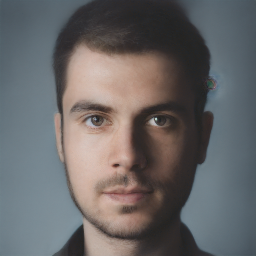

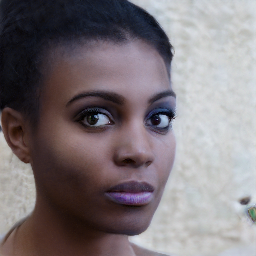

In [20]:
display(PIL.Image.open('generated_images/stock_photo_01.png').resize((256,256)))
display(PIL.Image.open('generated_images/stock_photo2_01.png').resize((256,256)))

Great job, everybody, nailed it! ... wait, what's that you say, the second image doesn't quite look the same? Hmm... let's try to do a better job, shall we?

Using TensorFlow backend.
Instructions for updating:
Colocations handled automatically by placer.
  0%|                                                  | 0/1000 [00:00<?, ?it/s]WARNING:tensorflow:From /home/anpei/anaconda3/envs/styleGan/lib/python3.7/site-packages/tensorflow/python/ops/math_ops.py:3066: to_int32 (from tensorflow.python.ops.math_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
This op will be removed after the deprecation date. Please switch to tf.sets.difference().

stock_photo2_01: loss 220.2145; lr 0.0020:   9%| | 87/1000 [00:32<04:20,  3.51it/s]


stock_photo2_01: loss 199.9238; lr 0.0018:  18%|▏| 180/1000 [00:58<03:54,  3.49it/s]


stock_photo2_01: loss 190.6318; lr 0.0016:  27%|▎| 273/1000 [01:25<03:28,  3.48it/s]


stock_photo2_01: loss 183.5961; lr 0.0015:  37%|▎| 366/1000 [01:52<03:01,  3.50it/s]


stock_photo2_01: loss 178.5907; lr 0.0013:  46%|▍| 459/1000 [02:18<02:34,  3.50it/s]


stock_photo2_01: loss 174.9833; lr 0.0012:  55%|▌| 552/1000 [02:45<02:08,  3.50it/s]


stock_photo2_01: loss 171.9865; lr 0.0011:  64%|▋| 645/1000 [03:12<01:41,  3.50it/s]


stock_photo2_01: loss 169.3292; lr 0.0010:  74%|▋| 738/1000 [03:38<01:15,  3.47it/s]


stock_photo2_01: loss 167.1737; lr 0.0009:  83%|▊| 831/1000 [04:05<00:48,  3.48it/s]


stock_photo2_01: loss 165.4270; lr 0.0008:  92%|▉| 924/1000 [04:32<00:21,  3.46it/s]


stock_photo2_01: loss 164.1674; lr 0.0007: 100%|█| 1000/1000 [04:53<00:00,  3.48it/s]
                                                                                     stock_photo2_01  Loss 164.1674
100%|████████████████████████████████████████████| 1/1 [04:56<00:00, 296.91s/it]


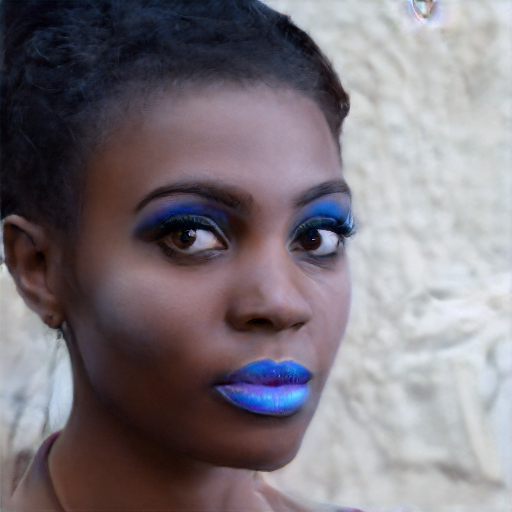

In [21]:
!mv aligned_images/stock_photo_01.png .
!python encode_images.py --output_video=True --lr=0.002 --iterations=1000 --use_l1_penalty=0.2 aligned_images/ generated_images/ latent_representations/
display(PIL.Image.open('generated_images/stock_photo2_01.png').resize((512,512)))

When in doubt, mess with the parameters... here, we lowered the l1 penalty on the dlatents, to allow for greater variation outside of what StyleGAN knows well, and we've lowered the learning rate and raised the number of iterations, to allow for more gradual changes. See more options below:

In [22]:
!python encode_images.py --help

Using TensorFlow backend.
usage: encode_images.py [-h] [--data_dir DATA_DIR] [--mask_dir MASK_DIR]
                        [--load_last LOAD_LAST] [--dlatent_avg DLATENT_AVG]
                        [--model_url MODEL_URL] [--model_res MODEL_RES]
                        [--batch_size BATCH_SIZE] [--image_size IMAGE_SIZE]
                        [--resnet_image_size RESNET_IMAGE_SIZE] [--lr LR]
                        [--decay_rate DECAY_RATE] [--iterations ITERATIONS]
                        [--decay_steps DECAY_STEPS]
                        [--load_effnet LOAD_EFFNET]
                        [--load_resnet LOAD_RESNET]
                        [--use_vgg_loss USE_VGG_LOSS]
                        [--use_vgg_layer USE_VGG_LAYER]
                        [--use_pixel_loss USE_PIXEL_LOSS]
                        [--use_mssim_loss USE_MSSIM_LOSS]
                        [--use_lpips_loss USE_LPIPS_LOSS]
                        [--use_l1_penalty USE_L1_PENALTY]
                        [--ra

Ok, that's nice, but what to do with the latents? Well, I'm glad you asked, let's see what we can do with the two latent representations we now have to rub together...

In [ ]:
import numpy as np
import config
import dnnlib
import dnnlib.tflib as tflib
import pickle
import PIL.Image
# load the StyleGAN model into Colab
# URL_FFHQ = 'https://drive.google.com/uc?id=1MEGjdvVpUsu1jB4zrXZN7Y4kBBOzizDQ'
URL_FFHQ = './cache/karras2019stylegan-ffhq-1024x1024.pkl'
tflib.init_tf()
with dnnlib.util.open_url(URL_FFHQ, cache_dir=config.cache_dir) as f:
    generator_network, discriminator_network, Gs_network = pickle.load(f)
# load the latents
s1 = np.load('latent_representations/stock_photo_01.npy')
s2 = np.load('latent_representations/stock_photo2_01.npy')
s1 = np.expand_dims(s1,axis=0)
s2 = np.expand_dims(s2,axis=0)
# combine the latents somehow... let's try an average:
savg = 0.5*(s1+s2)
# run the generator network to render the latents:
synthesis_kwargs = dict(output_transform=dict(func=tflib.convert_images_to_uint8, nchw_to_nhwc=False), minibatch_size=8)
images = Gs_network.components.synthesis.run(savg, randomize_noise=False, **synthesis_kwargs)
display(PIL.Image.fromarray(images.transpose((0,2,3,1))[0], 'RGB').resize((512,512),PIL.Image.LANCZOS))

Ok, that looks complicated. Can we do it again, but simpler? Sure. (Restart the runtime if it gives you trouble...)

In [3]:
import math
import pickle
import PIL.Image
import numpy as np
import config
import dnnlib
import dnnlib.tflib as tflib
from encoder.generator_model import Generator
# URL_FFHQ = 'https://drive.google.com/uc?id=1MEGjdvVpUsu1jB4zrXZN7Y4kBBOzizDQ'
URL_FFHQ = './cache/karras2019stylegan-ffhq-1024x1024.pkl'
tflib.init_tf()
with dnnlib.util.open_url(URL_FFHQ, cache_dir=config.cache_dir) as f:
    generator_network, discriminator_network, Gs_network = pickle.load(f)

generator = Generator(Gs_network, batch_size=1, randomize_noise=False)

model_res = 1024
model_scale = int(2*(math.log(model_res,2)-1))

def generate_raw_image(latent_vector):
    latent_vector = latent_vector.reshape((1, model_scale, 512))
    generator.set_dlatents(latent_vector)
    return generator.generate_images()[0]

def generate_image(latent_vector):
    img_array = generate_raw_image(latent_vector)
    img = PIL.Image.fromarray(img_array, 'RGB')
    return img

s1 = np.load('latent_representations/stock_photo_01.npy')
s2 = np.load('latent_representations/stock_photo2_01.npy')
s1 = np.expand_dims(s1,axis=0)
s2 = np.expand_dims(s2,axis=0)

display(generate_image(0.3*s1+0.7*s2).resize((512,512),PIL.Image.LANCZOS))

ValueError: Variable learnable_dlatents already exists, disallowed. Did you mean to set reuse=True or reuse=tf.AUTO_REUSE in VarScope? Originally defined at:

  File "/home/anpei/Desktop/stylegan-encoder/encoder/generator_model.py", line 23, in create_variable_for_generator
    initializer=tf.initializers.random_normal())
  File "/home/anpei/Desktop/stylegan-encoder/dnnlib/tflib/network.py", line 436, in <listcomp>
    in_expr = [input_builder(name) for input_builder, name in zip(custom_inputs, self.input_names)]
  File "/home/anpei/Desktop/stylegan-encoder/dnnlib/tflib/network.py", line 436, in run
    in_expr = [input_builder(name) for input_builder, name in zip(custom_inputs, self.input_names)]


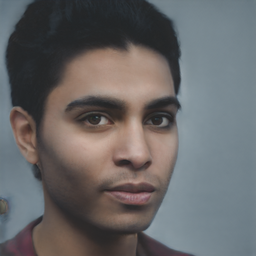

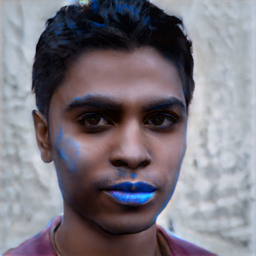

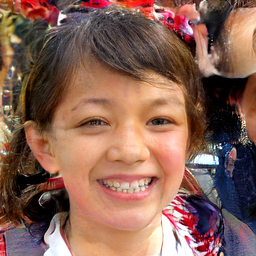

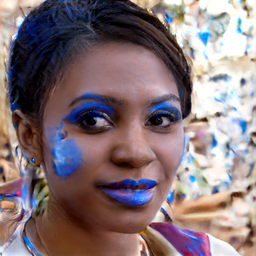

In [28]:
# more stupid latent tricks
lr = ((np.arange(1,model_scale+1)/model_scale)**0.75).reshape((model_scale,1))
rl = 1-lr
display(generate_image(lr*s1+rl*s2).resize((256,256),PIL.Image.LANCZOS))

lr = ((np.arange(1,model_scale+1)/model_scale)**0.25).reshape((model_scale,1))
rl = 1-lr
display(generate_image(lr*s2+rl*s1).resize((256,256),PIL.Image.LANCZOS))

display(generate_image(-0.5*s1).resize((256,256),PIL.Image.LANCZOS))
display(generate_image(-0.5*s1+(lr*s2+rl*s1)).resize((256,256),PIL.Image.LANCZOS))